In [1]:
from statistics import mean
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
color='#003F72'

In [2]:
def abss(x):
    if x>=0: return x
    else: return -1*x

In [3]:
boston=pd.read_csv('train.csv')

In [4]:
print(boston.head())
headers=boston.dtypes.index
header=headers.tolist()
features=[boston['rm'],boston['lstat']]
Y=np.array(boston['medv'])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [5]:
X=[]
depth=len(Y)
width=len(features)
for i in range(depth):
    X.append([1])
    for j in range(width):
        X[i].append(features[j][i])
    #X[i].append(Y[i])

In [6]:
X

[[1, 6.575, 4.98],
 [1, 6.421, 9.14],
 [1, 6.997999999999999, 2.94],
 [1, 7.147, 5.33],
 [1, 6.0120000000000005, 12.43],
 [1, 6.377000000000001, 20.45],
 [1, 6.0089999999999995, 13.27],
 [1, 5.888999999999999, 15.71],
 [1, 5.949, 8.26],
 [1, 6.096, 10.26],
 [1, 5.834, 8.47],
 [1, 5.935, 6.58],
 [1, 5.456, 11.69],
 [1, 5.57, 21.02],
 [1, 5.965, 13.83],
 [1, 6.142, 18.72],
 [1, 5.813, 19.88],
 [1, 6.047000000000001, 17.28],
 [1, 5.712999999999999, 22.6],
 [1, 6.072, 13.04],
 [1, 6.096, 20.34],
 [1, 5.966, 10.13],
 [1, 6.595, 4.32],
 [1, 7.024, 1.98],
 [1, 6.169, 5.81],
 [1, 6.211, 7.44],
 [1, 6.069, 9.55],
 [1, 5.682, 10.21],
 [1, 5.7860000000000005, 14.15],
 [1, 6.03, 18.8],
 [1, 5.602, 16.2],
 [1, 5.962999999999999, 13.45],
 [1, 6.115, 9.43],
 [1, 5.997999999999999, 8.43],
 [1, 5.888, 14.8],
 [1, 7.249, 4.81],
 [1, 6.382999999999999, 5.77],
 [1, 6.816, 3.95],
 [1, 6.145, 6.86],
 [1, 5.7410000000000005, 13.15],
 [1, 5.966, 14.44],
 [1, 6.7620000000000005, 9.5],
 [1, 7.104, 8.05],
 [1, 6

In [7]:
X=np.matrix(X)
Y=np.mat(Y).T
print(X)
#XT_X=np.dot(X.T,X)
#XT_Y=np.dot(X.T,Y)

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]
 [ 1.     6.012 12.43 ]
 [ 1.     6.377 20.45 ]
 [ 1.     6.009 13.27 ]
 [ 1.     5.889 15.71 ]
 [ 1.     5.949  8.26 ]
 [ 1.     6.096 10.26 ]
 [ 1.     5.834  8.47 ]
 [ 1.     5.935  6.58 ]
 [ 1.     5.456 11.69 ]
 [ 1.     5.57  21.02 ]
 [ 1.     5.965 13.83 ]
 [ 1.     6.142 18.72 ]
 [ 1.     5.813 19.88 ]
 [ 1.     6.047 17.28 ]
 [ 1.     5.713 22.6  ]
 [ 1.     6.072 13.04 ]
 [ 1.     6.096 20.34 ]
 [ 1.     5.966 10.13 ]
 [ 1.     6.595  4.32 ]
 [ 1.     7.024  1.98 ]
 [ 1.     6.169  5.81 ]
 [ 1.     6.211  7.44 ]
 [ 1.     6.069  9.55 ]
 [ 1.     5.682 10.21 ]
 [ 1.     5.786 14.15 ]
 [ 1.     6.03  18.8  ]
 [ 1.     5.602 16.2  ]
 [ 1.     5.963 13.45 ]
 [ 1.     6.115  9.43 ]
 [ 1.     5.998  8.43 ]
 [ 1.     5.888 14.8  ]
 [ 1.     7.249  4.81 ]
 [ 1.     6.383  5.77 ]
 [ 1.     6.816  3.95 ]
 [ 1.     6.145  6.86 ]
 [ 1.     5.741 13.15 ]
 [ 1.     5.966 14.44 ]
 [ 1.     6.762 

In [8]:
X.T

matrix([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1

In [9]:
inverse=np.dot(X.T,X).I
intermediate_rep=np.dot(inverse,X.T)
beta=np.dot(intermediate_rep,Y)

In [10]:
beta

matrix([[ 0.1039438 ],
        [ 4.92846523],
        [-0.65639414]])

In [11]:
new_y=np.dot(X,beta)

In [12]:
#print(new_y)
error=Y-new_y
print(error)

[[-5.23975985e+00]
 [-4.15017656e+00]
 [ 7.36455304e-01]
 [ 4.37089599e+00]
 [ 1.32510246e+00]
 [-3.10950631e+00]
 [-2.10874107e+00]
 [ 2.88427647e+00]
 [-3.60156782e+00]
 [-5.21326392e+00]
 [-3.39695155e+00]
 [-1.93531147e+00]
 [ 8.79597456e-01]
 [-1.58090209e-01]
 [-8.24307876e-01]
 [-2.88687885e+00]
 [-1.20399659e+00]
 [-3.76388223e+00]
 [-7.25757988e-01]
 [-6.97020503e+00]
 [-3.29681094e+00]
 [ 1.84210532e+00]
 [ 1.02845071e+00]
 [ 1.47817683e+00]
 [-1.39399582e+00]
 [-1.13106891e+00]
 [-2.54623520e+00]
 [-2.10569902e+00]
 [ 6.67933526e-01]
 [-8.82379217e-01]
 [ 2.32037913e+00]
 [-9.63880721e-01]
 [-3.55171190e+00]
 [-7.31475611e-01]
 [-5.08113733e-01]
 [ 2.72686758e+00]
 [-3.07494315e+00]
 [ 4.96394062e-01]
 [-2.58649881e+00]
 [-1.06667968e+00]
 [-4.02883591e+00]
 [-2.19448131e+00]
 [ 3.16821207e+00]
 [-4.53862944e+00]
 [-2.50349605e+00]
 [-1.75666985e+00]
 [-1.68157894e+00]
 [-3.11893653e+00]
 [-3.57178974e+00]
 [-2.53299731e+00]
 [-2.46985389e+00]
 [-3.81611258e+00]
 [-3.1927390

In [13]:
correct=0
for val in error:
    if val<=5:
        correct+=1
accuracy=correct/float(len(error))
print(accuracy)

0.8648648648648649


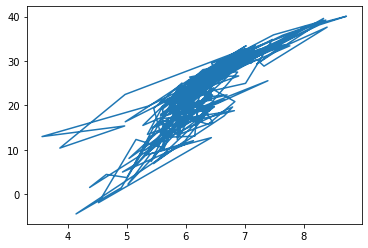

In [14]:
plt.plot(np.array(X[:,1]),np.array(new_y))

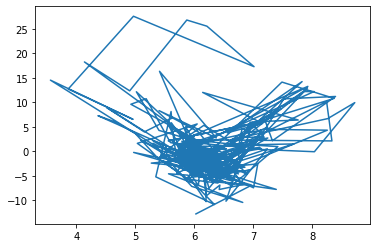

In [15]:
plt.plot(np.array(X[:,1]),np.array(Y-new_y))

In [16]:
X[:,1]

matrix([[6.575],
        [6.421],
        [6.998],
        [7.147],
        [6.012],
        [6.377],
        [6.009],
        [5.889],
        [5.949],
        [6.096],
        [5.834],
        [5.935],
        [5.456],
        [5.57 ],
        [5.965],
        [6.142],
        [5.813],
        [6.047],
        [5.713],
        [6.072],
        [6.096],
        [5.966],
        [6.595],
        [7.024],
        [6.169],
        [6.211],
        [6.069],
        [5.682],
        [5.786],
        [6.03 ],
        [5.602],
        [5.963],
        [6.115],
        [5.998],
        [5.888],
        [7.249],
        [6.383],
        [6.816],
        [6.145],
        [5.741],
        [5.966],
        [6.762],
        [7.104],
        [6.29 ],
        [5.787],
        [5.878],
        [5.594],
        [6.417],
        [6.065],
        [6.245],
        [6.273],
        [6.286],
        [6.279],
        [6.14 ],
        [6.727],
        [6.619],
        [6.167],
        [6.389],
        [6.63 

In [17]:
print(error)
for val in error:
    val*=val

[[-5.23975985e+00]
 [-4.15017656e+00]
 [ 7.36455304e-01]
 [ 4.37089599e+00]
 [ 1.32510246e+00]
 [-3.10950631e+00]
 [-2.10874107e+00]
 [ 2.88427647e+00]
 [-3.60156782e+00]
 [-5.21326392e+00]
 [-3.39695155e+00]
 [-1.93531147e+00]
 [ 8.79597456e-01]
 [-1.58090209e-01]
 [-8.24307876e-01]
 [-2.88687885e+00]
 [-1.20399659e+00]
 [-3.76388223e+00]
 [-7.25757988e-01]
 [-6.97020503e+00]
 [-3.29681094e+00]
 [ 1.84210532e+00]
 [ 1.02845071e+00]
 [ 1.47817683e+00]
 [-1.39399582e+00]
 [-1.13106891e+00]
 [-2.54623520e+00]
 [-2.10569902e+00]
 [ 6.67933526e-01]
 [-8.82379217e-01]
 [ 2.32037913e+00]
 [-9.63880721e-01]
 [-3.55171190e+00]
 [-7.31475611e-01]
 [-5.08113733e-01]
 [ 2.72686758e+00]
 [-3.07494315e+00]
 [ 4.96394062e-01]
 [-2.58649881e+00]
 [-1.06667968e+00]
 [-4.02883591e+00]
 [-2.19448131e+00]
 [ 3.16821207e+00]
 [-4.53862944e+00]
 [-2.50349605e+00]
 [-1.75666985e+00]
 [-1.68157894e+00]
 [-3.11893653e+00]
 [-3.57178974e+00]
 [-2.53299731e+00]
 [-2.46985389e+00]
 [-3.81611258e+00]
 [-3.1927390

In [18]:
error

matrix([[2.74550833e+01],
        [1.72239655e+01],
        [5.42366415e-01],
        [1.91047318e+01],
        [1.75589652e+00],
        [9.66902951e+00],
        [4.44678889e+00],
        [8.31905078e+00],
        [1.29712908e+01],
        [2.71781207e+01],
        [1.15392798e+01],
        [3.74543048e+00],
        [7.73691684e-01],
        [2.49925143e-02],
        [6.79483475e-01],
        [8.33406952e+00],
        [1.44960778e+00],
        [1.41668094e+01],
        [5.26724658e-01],
        [4.85837582e+01],
        [1.08689624e+01],
        [3.39335202e+00],
        [1.05771087e+00],
        [2.18500674e+00],
        [1.94322436e+00],
        [1.27931688e+00],
        [6.48331369e+00],
        [4.43396836e+00],
        [4.46135195e-01],
        [7.78593082e-01],
        [5.38415929e+00],
        [9.29066044e-01],
        [1.26146574e+01],
        [5.35056569e-01],
        [2.58179566e-01],
        [7.43580681e+00],
        [9.45527537e+00],
        [2.46407065e-01],
        [6.6

In [19]:
sum(error)

matrix([[10216.20987786]])

In [20]:
s=0
for val in error:
    s+=val
print(s)

[[10216.20987786]]


In [21]:
for i in range(30):
    print(Y[i],new_y[i], Y[i]-new_y[i])

[[24.]] [[29.23975985]] [[-5.23975985]]
[[21.6]] [[25.75017656]] [[-4.15017656]]
[[33.4]] [[32.6635447]] [[0.7364553]]
[[36.2]] [[31.82910401]] [[4.37089599]]
[[22.9]] [[21.57489754]] [[1.32510246]]
[[15.]] [[18.10950631]] [[-3.10950631]]
[[18.9]] [[21.00874107]] [[-2.10874107]]
[[21.7]] [[18.81572353]] [[2.88427647]]
[[20.4]] [[24.00156782]] [[-3.60156782]]
[[18.2]] [[23.41326392]] [[-5.21326392]]
[[19.9]] [[23.29695155]] [[-3.39695155]]
[[23.1]] [[25.03531147]] [[-1.93531147]]
[[20.2]] [[19.32040254]] [[0.87959746]]
[[13.6]] [[13.75809021]] [[-0.15809021]]
[[19.6]] [[20.42430788]] [[-0.82430788]]
[[15.2]] [[18.08687885]] [[-2.88687885]]
[[14.5]] [[15.70399659]] [[-1.20399659]]
[[14.8]] [[18.56388223]] [[-3.76388223]]
[[12.7]] [[13.42575799]] [[-0.72575799]]
[[14.5]] [[21.47020503]] [[-6.97020503]]
[[13.5]] [[16.79681094]] [[-3.29681094]]
[[24.7]] [[22.85789468]] [[1.84210532]]
[[30.8]] [[29.77154929]] [[1.02845071]]
[[34.9]] [[33.42182317]] [[1.47817683]]
[[25.3]] [[26.69399582]] [[-

In [22]:
new_y[0]

matrix([[29.23975985]])

In [23]:
correct=0
for val in error:
    if np.sqrt(val)<=5:
        correct+=1
accuracy=correct/float(len(error))

In [24]:
accuracy

0.7537537537537538